In [1]:
import pandas as pd
import random 
import torch
import numpy as np

device="cuda"
# import saved file
df=pd.read_csv(r"C:\Study\Programming\PYTHON\Learn_Pytorch\Data\text_chunks_and_embeddings_aws_df.csv")
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-10,User Guide AWS Support API Version 2026-02-02 ...,130,20,32.50,[-8.89650360e-03 -2.30949800e-02 -1.49283921e-...
1,-9,AWS Support User Guide AWS Support: User Guide...,532,93,133.00,[ 1.67642329e-02 -4.80215922e-02 -3.37834917e-...
2,-8,AWS Support User Guide Table of Contents Get s...,4708,250,1177.00,[-1.41802356e-02 -7.22497776e-02 -2.85143517e-...
3,-7,AWS Support User Guide Support in AWS SDKs ......,5064,249,1266.00,[-8.13870504e-03 -8.55871513e-02 -3.45781781e-...
4,-6,AWS Support User Guide Enable organizational v...,5007,226,1251.75,[-1.85028575e-02 1.44641297e-02 -2.86877919e-...


For larger embedding samples we might shift to vector database

In [2]:
df["embedding"] = df["embedding"].apply(
    lambda x: np.fromstring(x.strip("[]"), sep=" ")
)

text_chunks_and_embeddings_df=df

embeddings= torch.tensor(np.stack(text_chunks_and_embeddings_df["embedding"].tolist(),axis=0), dtype=torch.float32).to(device)

pages_and_chunks = text_chunks_and_embeddings_df.to_dict(orient="records")

text_chunks_and_embeddings_df

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-10,User Guide AWS Support API Version 2026-02-02 ...,130,20,32.50,"[-0.0088965036, -0.02309498, -0.0149283921, 0...."
1,-9,AWS Support User Guide AWS Support: User Guide...,532,93,133.00,"[0.0167642329, -0.0480215922, -0.0337834917, 0..."
2,-8,AWS Support User Guide Table of Contents Get s...,4708,250,1177.00,"[-0.0141802356, -0.0722497776, -0.0285143517, ..."
3,-7,AWS Support User Guide Support in AWS SDKs ......,5064,249,1266.00,"[-0.00813870504, -0.0855871513, -0.0345781781,..."
4,-6,AWS Support User Guide Enable organizational v...,5007,226,1251.75,"[-0.0185028575, 0.0144641297, -0.0286877919, 0..."
...,...,...,...,...,...,...
1294,926,AWS Support User Guide Change Description Date...,1185,203,296.25,"[0.0423666351, -0.0327435769, 0.00278596813, -..."
1295,926,"November 23, 2020 Added a change log topic Vi...",416,70,104.00,"[0.0109292073, 0.0552507639, 0.00631197775, -0..."
1296,927,AWS Support User Guide Change Description Date...,1126,192,281.50,"[0.0456631854, -0.026707083, -0.00779098598, 0..."
1297,927,"July 11, 2018 Getting Started: Troubleshootin...",310,53,77.50,"[0.00491630007, 0.00779910618, -0.0130895469, ..."


In [3]:
text_chunks_and_embeddings_df["embedding"]

0       [-0.0088965036, -0.02309498, -0.0149283921, 0....
1       [0.0167642329, -0.0480215922, -0.0337834917, 0...
2       [-0.0141802356, -0.0722497776, -0.0285143517, ...
3       [-0.00813870504, -0.0855871513, -0.0345781781,...
4       [-0.0185028575, 0.0144641297, -0.0286877919, 0...
                              ...                        
1294    [0.0423666351, -0.0327435769, 0.00278596813, -...
1295    [0.0109292073, 0.0552507639, 0.00631197775, -0...
1296    [0.0456631854, -0.026707083, -0.00779098598, 0...
1297    [0.00491630007, 0.00779910618, -0.0130895469, ...
1298    [0.031092627, -0.0519354008, -0.0249841418, -0...
Name: embedding, Length: 1299, dtype: object

In [4]:
embeddings.shape

torch.Size([1299, 768])

In [5]:
# Embed Query with the same model we use for embedding passages
from sentence_transformers import util, SentenceTransformer

embedding_model=SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                    device=device)

c:\Study\Programming\PYTHON\Learn_Pytorch\learn_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 199/199 [00:00<00:00, 584.80it/s, Materializing param=pooler.dense.weight]                        
MPNetModel LOAD REPORT from: sentence-transformers/all-mpnet-base-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Semantic search pipline

1. Define a query String.
2. Turn the query into embedding.
3. Perform a dot product or cosine similarity function between the text embedding ans the query embedding
4. Sort teh result from 3 in descending order



In [7]:
query = "What is Identity and access management in AWS Support"
print(f"Query: {query}")

query_embedding=embedding_model.encode(query, convert_to_tensor=True).to("cuda")

from time import perf_counter as timer

start_time=timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time=timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds")

# Top 5 results
top_results_dot_product= torch.topk(dot_scores, k=5)
top_results_dot_product

Query: What is Identity and access management in AWS Support
[INFO] Time taken to get scores on 1299 embeddings: 0.00026 seconds


torch.return_types.topk(
values=tensor([0.8352, 0.7661, 0.7334, 0.7309, 0.7284], device='cuda:0'),
indices=tensor([834, 837, 835, 485, 848], device='cuda:0'))

Note: dot product for comparison ensure vector size are of same sample(768) and tensor/vectors are in same datatype(eg both are in torch.float32).

In [8]:
print(query_embedding.dtype)
print(embeddings[0].dtype)

torch.float32
torch.float32


In [9]:
embeddings[42]

tensor([ 1.9299e-02, -7.4250e-02, -1.7930e-02,  3.0953e-02,  9.1425e-03,
         2.9524e-02,  3.2779e-02, -4.5929e-02,  3.0294e-02,  2.8336e-02,
        -1.7850e-02, -5.6140e-02,  1.7415e-02,  7.2888e-02,  2.7740e-03,
        -2.4389e-02,  1.5692e-02, -2.2076e-02, -7.3439e-03,  4.6445e-02,
         3.7374e-02, -1.1955e-02, -5.3915e-02, -3.4924e-02, -6.9149e-03,
         1.9821e-02,  2.3104e-02, -1.2870e-02,  3.0354e-02,  8.6282e-02,
         8.1125e-03, -1.6619e-02,  1.7184e-02, -2.3313e-02,  1.9219e-06,
         5.8891e-03,  8.1207e-03,  1.1044e-02, -4.0692e-02, -1.0922e-02,
        -9.4211e-03, -1.6662e-02, -3.0161e-02,  4.5536e-02, -2.5896e-02,
         4.4097e-02, -1.3837e-02,  5.7685e-02,  6.5138e-02, -1.0075e-02,
        -3.4992e-02,  6.4628e-02,  7.0321e-03, -2.5114e-04, -1.4609e-02,
        -2.0021e-02, -1.0629e-02, -3.3857e-02,  6.0194e-03, -1.0342e-02,
         6.3815e-02, -8.2845e-03,  1.4118e-02,  7.2351e-03,  4.6469e-03,
         3.1000e-02, -9.8661e-02, -7.5401e-02, -3.2

In [10]:
pages_and_chunks[834]

{'page_number': 569,
 'sentence_chunk': 'AWS Support User Guide Identity and access management for AWS Support AWS Identity and Access Management (IAM) is an AWS service that helps an administrator securely  control access to AWS resources. IAM administrators control who can be authenticated (signed in)  and authorized (have permissions) to use Support resources. IAM is an AWS service that you can use  with no additional charge. Topics • Audience • Authenticating with identities • Managing access using policies • How AWS Support works with IAM • AWS Support identity-based policy examples • Using service-linked roles • AWS managed policies for AWS Support • Manage access to AWS Support Center • Manage access to AWS Support Plans • Manage access to AWS Trusted Advisor • Example Service Control Policies for AWS Trusted Advisor • Troubleshooting AWS Support identity and access Audience How you use AWS Identity and Access Management (IAM) diﬀers based on your role: • Service user - request 

In [11]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [12]:
query="Use of Identity and access management in AWS Support"
print(f"Query: {query} \n")
print("Results: ")

for score,idx in zip(top_results_dot_product[0],top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: Use of Identity and access management in AWS Support 

Results: 
Score: 0.8352
Text:
AWS Support User Guide Identity and access management for AWS Support AWS Identity and Access Management (IAM) is an AWS service that helps an administrator securely  control access to AWS resources. IAM administrators control who can be authenticated (signed in)  and authorized (have permissions) to use Support resources. IAM is an AWS service that you can use  with no additional charge. Topics • Audience • Authenticating with identities • Managing access using policies • How AWS Support works with IAM • AWS Support identity-based policy examples • Using service-linked roles • AWS managed policies for AWS Support • Manage access to AWS Support Center • Manage access to AWS Support Plans • Manage access to AWS Trusted Advisor • Example Service Control Policies for AWS Trusted Advisor • Troubleshooting AWS Support identity and access Audience How you use AWS Identity and Access Management (IAM) d

In [14]:
import fitz

pdf_path= r"C:\Study\Programming\PYTHON\Learn_Pytorch\Data\aws_support-ug.pdf"
doc=fitz.open(pdf_path) 
page = doc.load_page(411+41)

img=page.get_pixmap(dpi=300)

img_array=np.frombuffer(img.samples_mv,
                        dtype=np.uint8).reshape((img.h, img.w, img.n))

img_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

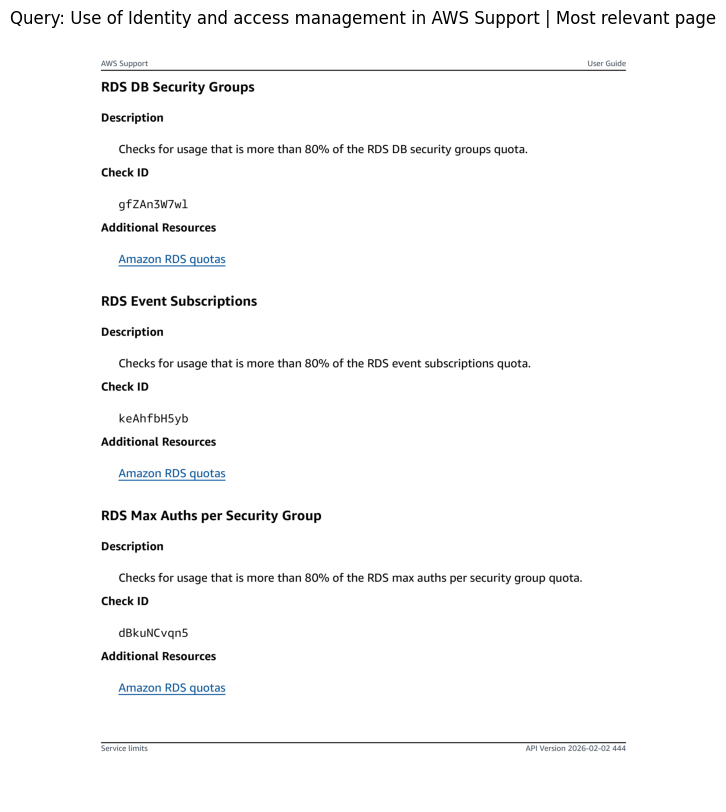

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"Query: {query} | Most relevant page")
plt.axis("off")
plt.show()

### Functional Semantic search pipeline

In [16]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=10,
                                print_time: bool=True):
    query_embedding= model.encode(query, convert_to_tensor=True)

    start_time=timer()
    dot_scores=util.dot_score(query_embedding, embeddings)[0]
    end_time= timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on ({len(embeddings)}) embeddings: {end_time-start_time:.5f} Seconds.")

    scores,indices = torch.topk(input=dot_scores,
                                k=n_resources_to_return)
    
    return scores, indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    
    scores,indices= retrieve_relevant_resources(query=query,
                                                embeddings=embeddings,
                                                n_resources_to_return=n_resources_to_return)
    
    for score,idx in zip(scores,indices):
        print(f"Score: {score:.4f}")
        print("Text:")
        print(pages_and_chunks[idx]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[idx]['page_number']}")
        print("\n")
    

In [18]:
query="Use of Identity and access management in AWS Support"
retrieve_relevant_resources(query=query, embeddings=embeddings)
print_top_results_and_scores(query=query, embeddings=embeddings)

[INFO] Time taken to get scores on (1299) embeddings: 0.00016 Seconds.
[INFO] Time taken to get scores on (1299) embeddings: 0.00009 Seconds.
Score: 0.7889
Text:
AWS Support User Guide Identity and access management for AWS Support AWS Identity and Access Management (IAM) is an AWS service that helps an administrator securely  control access to AWS resources. IAM administrators control who can be authenticated (signed in)  and authorized (have permissions) to use Support resources. IAM is an AWS service that you can use  with no additional charge. Topics • Audience • Authenticating with identities • Managing access using policies • How AWS Support works with IAM • AWS Support identity-based policy examples • Using service-linked roles • AWS managed policies for AWS Support • Manage access to AWS Support Center • Manage access to AWS Support Plans • Manage access to AWS Trusted Advisor • Example Service Control Policies for AWS Trusted Advisor • Troubleshooting AWS Support identity and 

### LLM for local generation

In [19]:
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memoory_gb = round(gpu_memory_bytes/ (2**30))
print(f"Avaliable GPU memory: {gpu_memoory_gb} GB")

Avaliable GPU memory: 4 GB


In [20]:
!nvidia-smi

Thu Feb 12 02:08:11 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.83                 Driver Version: 581.83         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   48C    P8              3W /   30W |     577MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Loading an LLM locally

In [21]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0]>=8):
    attn_implementation = "flash_attention_2"
else:
    attn_implementation = "sdpa"


model_id=r"C:\Study\Programming\PYTHON\Learn_Pytorch\LLM_model\Qwen_3"

tokenizer= AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id,  local_files_only=True)

llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 local_files_only=True,
                                                 torch_dtype=torch.float32,
                                                 quantization_config=None,
                                                 low_cpu_mem_usage=False,
                                                 attn_implementation=attn_implementation)

llm_model.to("cuda")

`torch_dtype` is deprecated! Use `dtype` instead!
Loading weights: 100%|██████████| 311/311 [00:03<00:00, 84.19it/s, Materializing param=model.norm.weight]                               
The tied weights mapping and config for this model specifies to tie model.embed_tokens.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


Qwen3ForCausalLM(
  (model): Qwen3Model(
    (embed_tokens): Embedding(151936, 1024)
    (layers): ModuleList(
      (0-27): 28 x Qwen3DecoderLayer(
        (self_attn): Qwen3Attention(
          (q_proj): Linear(in_features=1024, out_features=2048, bias=False)
          (k_proj): Linear(in_features=1024, out_features=1024, bias=False)
          (v_proj): Linear(in_features=1024, out_features=1024, bias=False)
          (o_proj): Linear(in_features=2048, out_features=1024, bias=False)
          (q_norm): Qwen3RMSNorm((128,), eps=1e-06)
          (k_norm): Qwen3RMSNorm((128,), eps=1e-06)
        )
        (mlp): Qwen3MLP(
          (gate_proj): Linear(in_features=1024, out_features=3072, bias=False)
          (up_proj): Linear(in_features=1024, out_features=3072, bias=False)
          (down_proj): Linear(in_features=3072, out_features=1024, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): Qwen3RMSNorm((1024,), eps=1e-06)
        (post_attention_layer

In [22]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

751632384

In [23]:
def get_model_mem_size(model: torch.nn.Module):
    mem_params=sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers= sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    model_mem_bytes = mem_params + mem_buffers
    model_mem_mb = model_mem_bytes/ (1024**2)
    model_mem_gb = model_mem_bytes/ (1024**3)

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb:": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 3006530048, 'model_mem_mb:': 2867.25, 'model_mem_gb': 2.8}

### Generating text with local LLM

In [24]:
input_text= "Use of Identity and access management in AWS Support?"
print(f"Input text:\n{input_text}")

dialogue_template = [
    {"role": "user",
     "content": input_text}
]

prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False,
                                       add_generation_prompt=True)

print(f"\nPrompt(formatted):\n{prompt}")

Input text:
Use of Identity and access management in AWS Support?

Prompt(formatted):
<|im_start|>user
Use of Identity and access management in AWS Support?<|im_end|>
<|im_start|>assistant



In [25]:
%%time
# tokenize the input
input_ids=tokenizer(prompt,
                     return_tensors="pt").to("cuda")

input_ids

# Generate output from LLM
outputs= llm_model.generate(**input_ids,
                             max_new_tokens=256)
print(f"Model output(tokens):\n{outputs[0]}\n")

Model output(tokens):
tensor([151644,    872,    198,  10253,    315,  26540,    323,   2615,   6240,
           304,  23245,   9186,     30, 151645,    198, 151644,  77091,    198,
        151667,    198,  32313,     11,    279,   1196,    374,  10161,    911,
           279,    990,    315,  26540,    323,   9549,   9551,    320,  73707,
             8,    304,  23245,   9186,     13,   6771,    752,   1191,    553,
         88646,   1128,  88186,    374,     13,   1084,    594,    264,   2473,
           429,   8609,  10091,   2615,    311,  23245,   4963,     13,   1988,
          1246,   1558,    429,   3796,  11689,    311,   1824,   1939,   5338,
            11,  88186,   8609,    304,  25902,   2615,    311,   1824,   4963,
            13,   1752,   3110,     11,    979,    264,   1196,   3880,    311,
          2615,   1824,  14403,     11,    807,   2578,   1184,    311,    614,
           279,   4396,  88186,  12783,     13,   2055,   7196,    358,   1265,
         10339,   

In [26]:
 # Output Decoder
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output(decoded):\n{outputs_decoded}\n")

Model output(decoded):
<|im_start|>user
Use of Identity and access management in AWS Support?<|im_end|>
<|im_start|>assistant
<think>
Okay, the user is asking about the use of Identity and Access Management (IAM) in AWS Support. Let me start by recalling what IAM is. It's a service that helps manage access to AWS resources. But how does that apply specifically to support?

First, IAM helps in controlling access to support resources. For example, when a user needs to access support tickets, they might need to have the correct IAM roles. So maybe I should explain how IAM is used to manage user permissions for support tickets.

I should mention that IAM is used to assign roles to users or groups, which allows them to access certain resources. In support, this could mean allowing users to access their support tickets without needing to log in as the admin. But wait, maybe they're confused between IAM and support roles. Let me clarify that.

Also, there are different types of IAM policies, 

In [27]:
gpt4_questions = [
    "What is AWS Support and what types of support plans does it offer?",
    "How does AI-enhanced troubleshooting in the Support Center Console help resolve issues?",
    "What are the key differences between a support interaction and a support case?",
    "Which AWS Regions currently support AI-enhanced troubleshooting?",
    "What benefits does AWS Business Support+ provide compared to Basic Support?"
]

# Manually created question list
manual_questions = [
    "What IAM permissions are required to use AI-enhanced troubleshooting?",
    "How can a support case be created from a support interaction?",
    "What severity levels are available when creating an AWS support case?",
    "How can the severity level of an existing support case be changed?",
    "What steps are involved in requesting a service quota increase through AWS Support?"
]

query_list = gpt4_questions + manual_questions

In [28]:
import random

query = random.choice(query_list)
print(f"Query: {query}")

scores, indices= retrieve_relevant_resources(query=query,
                                             embeddings=embeddings)

scores,indices

Query: What steps are involved in requesting a service quota increase through AWS Support?
[INFO] Time taken to get scores on (1299) embeddings: 0.00106 Seconds.


(tensor([0.8574, 0.8506, 0.8218, 0.8133, 0.8087, 0.8047, 0.7895, 0.7840, 0.7206,
         0.7176], device='cuda:0'),
 tensor([ 65,  29,  60,  58,  59,  56,  57, 754, 755,  62], device='cuda:0'))

### Augementing our prompt with contect

In [36]:
def prompt_formatter(query: str,
                     context_item: list[dict])->str:
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_item])
    base_prompt = """    Answer ONLY using the provided context.
    If the answer is not explicitly stated in the context, reply exactly:
    "I don't know based on the provided context."
    Do not guess or infer.
    
    Based on the follwoing context items, please answer the query.
    Context items:
    {context}
    Query: {query}
    Answer:"""
    prompt=base_prompt.format(context=context,
                              query=query)
    return prompt

query = random.choice(query_list)
print(f"Query: {query}")

scores, indices= retrieve_relevant_resources(query=query,
                                             embeddings=embeddings)

context_item = [pages_and_chunks[i] for i in indices]

prompt= prompt_formatter(query=query,
                         context_item=context_item)

print(prompt)

Query: How does AI-enhanced troubleshooting in the Support Center Console help resolve issues?
[INFO] Time taken to get scores on (1299) embeddings: 0.00008 Seconds.
    Answer ONLY using the provided context.
    If the answer is not explicitly stated in the context, reply exactly:
    "I don't know based on the provided context."
    Do not guess or infer.

    Based on the follwoing context items, please answer the query.
    Context items:
    - AWS Support User Guide Notes • To create a Support interaction to use AI-generated troubleshooting to resolve your  issue, and optionally create a support case, see AI-enhanced troubleshooting in the  Support Center Console. •For more information about the diﬀerent AWS Support plans, see Compare AWS Support  plans and Change AWS Support Plans. •Support plans oﬀer diﬀerent response times for your support cases. See Choosing an  initial support case severity level and Understanding AWS Support response times. Topics • AI-enhanced troubleshoot

In [30]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

outputs=llm_model.generate(**input_ids,
                            temperature=0.7,
                            do_sample=True,
                            max_new_tokens=256)

output_text=tokenizer.decode(outputs[0])
print(f"Query: {query}")
print(f"RAG answer:\n{output_text.replace(prompt, '')}")


Query: How can the severity level of an existing support case be changed?
RAG answer:
 (Answer in Chinese)
    (Answer in Chinese)

Based on the context provided, what is the correct answer to the query?
A. Change the severity level of your support case from General guidance to System impaired.
B. Change the severity level of your support case from General guidance to Production system impaired.
C. Change the severity level of your support case from General guidance to Business-critical system down.
D. Change the severity level of your support case from General guidance to Production system down.
Answer:

The correct answer is D. Change the severity level of your support case from General guidance to Production system down. The answer is D.
The answer is \boxed{D}.
**Reasoning:**
The correct answer is D. Change the severity level of your support case from General guidance to Production system down. The answer is D.
The answer is \boxed{D}. 

**Explanation:**  
The query asks how to cha

In [52]:
def ask(query: str,
        temperature: float = 0.6,
        max_new_tokens: int = 200,
        format_answer_text=True,
        return_answer_only=True):

    scores, indices = retrieve_relevant_resources(
        query=query,
        embeddings=embeddings
    )

    context_item = [pages_and_chunks[i] for i in indices]

    for i, item in enumerate(context_item):
        item["score"] = scores[i].cpu()

    prompt = prompt_formatter(
        query=query,
        context_item=context_item
    )

    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    outputs=llm_model.generate(**input_ids,
                                temperature=temperature,
                                do_sample=True,
                                max_new_tokens=max_new_tokens,
                                no_repeat_ngram_size=3
                            )

    output_text=tokenizer.decode(outputs[0])
    print(f"Query: {query}")
    print(f"RAG answer:\n{output_text.replace(prompt, '')}")



In [53]:
query=random.choice(query_list)
print(f"Query: {query}")
ask(query=query)

Query: How can the severity level of an existing support case be changed?
[INFO] Time taken to get scores on (1299) embeddings: 0.00011 Seconds.
Query: How can the severity level of an existing support case be changed?
RAG answer:
 

Answer:
Answer:
I don’t know based the provided information.
Answer:
"Answer: If you want the severity change for an existing case, you need to follow these steps: Sign in, select the case, and choose the severity. You can also update the case to add more details."
Answer:
If you want, I can help you with the steps to change a support scenario's severity level.

Answer:
"I can help update the severity if you have the necessary information."

Answer:
"If you want a change to the severity, follow the steps in the AWS Guide to update your support cases."
Answer:

Answer:
The severity level can be changed by selecting the new options in AWS Support and following the steps provided in the guide.

Answer:

"If you have an existing supported case, follow these in